In [198]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [199]:
train=pd.read_csv("/kaggle/input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [200]:
test=pd.read_csv("/kaggle/input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploratory Data Analysis

In [202]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [203]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Start by analyzing the ratio of the target variable ie Survived

<Axes: xlabel='Survived', ylabel='count'>

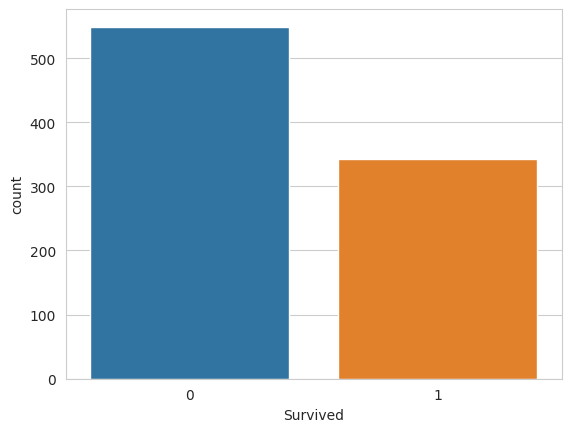

In [204]:
sns.countplot(x='Survived', data=train)

According to the dataset, a majority of the passengers did not survive.
Now let's analyze the survival of passengers and their passenger class

<Axes: xlabel='Survived', ylabel='count'>

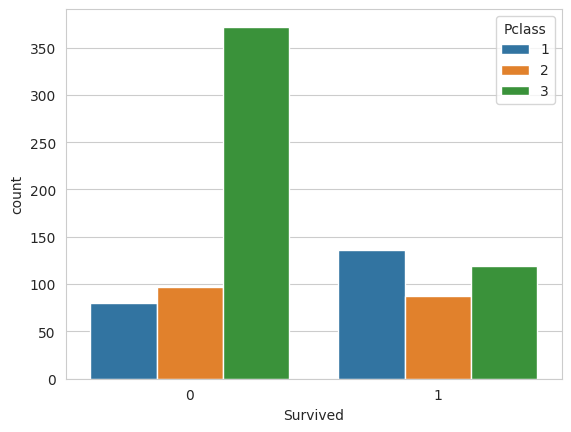

In [205]:
sns.countplot(x='Survived', hue='Pclass', data=train)

The interesting trend here is that a large number of class 3 passengers did not survive. Now let's do the same with gender

<Axes: xlabel='Survived', ylabel='count'>

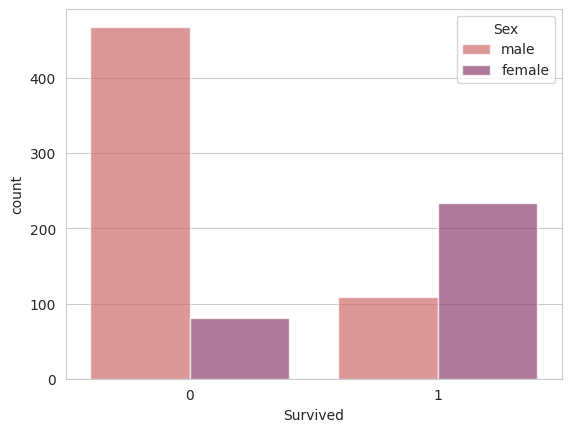

In [206]:
sns.countplot(x='Survived', hue='Sex', data=train,palette='flare',alpha=0.7)

From this plot, it can be seen that a majority of male passengers could not survive.

<Axes: xlabel='Pclass', ylabel='Fare'>

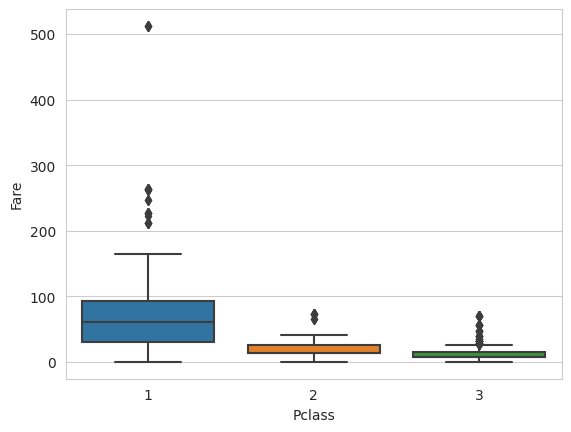

In [207]:

sns.boxplot(x='Pclass',y='Fare', data=train)

The distribution of fare among various classes can be seen above. Now we see
the distribution of age of passengers on the ship

/tmp/ipykernel_33/502578197.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False, bins=40, color='green')


<Axes: xlabel='Age'>

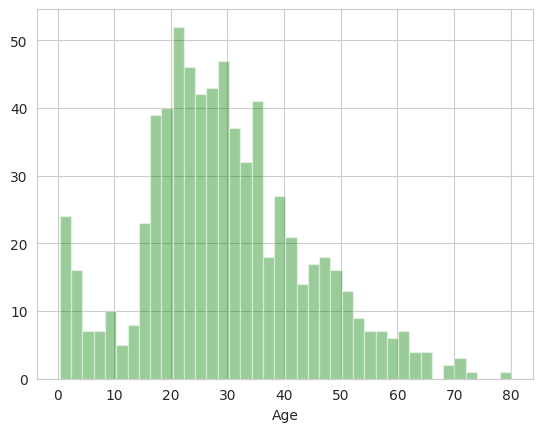

In [208]:
sns.distplot(train['Age'].dropna(),kde=False, bins=40, color='green')

A number of children below age 10 and a large chunk of people in their 20s-30s were present.
We can also see the age distribution among classes

<Axes: xlabel='Pclass', ylabel='Age'>

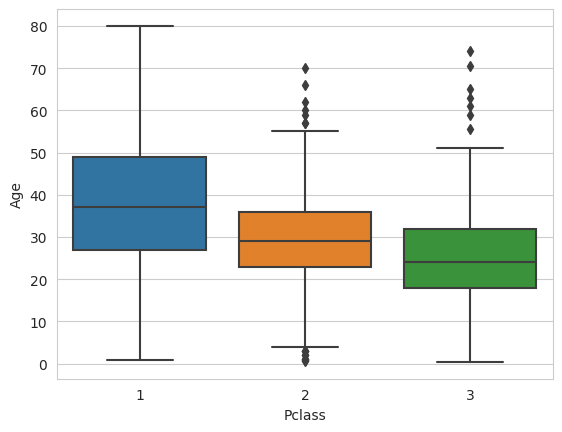

In [209]:
sns.boxplot(x='Pclass',y='Age',data=train)

The 1st and the most expensive class had more people in their late 30s and 40s than the 2nd and 3rd class.
Lastly let's analyze the sibling/spouse and parent/children column

<Axes: xlabel='SibSp', ylabel='count'>

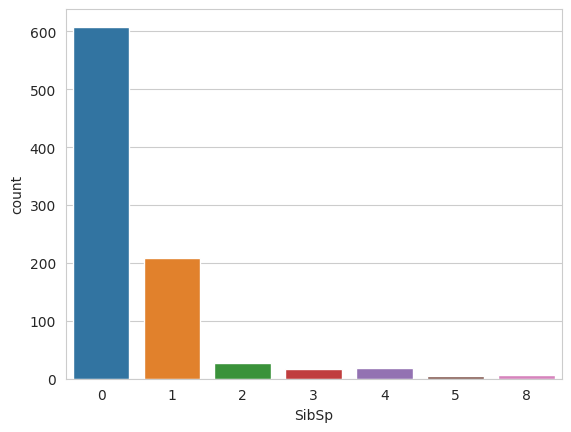

In [210]:
sns.countplot(x='SibSp', data=train)

<Axes: xlabel='Parch', ylabel='count'>

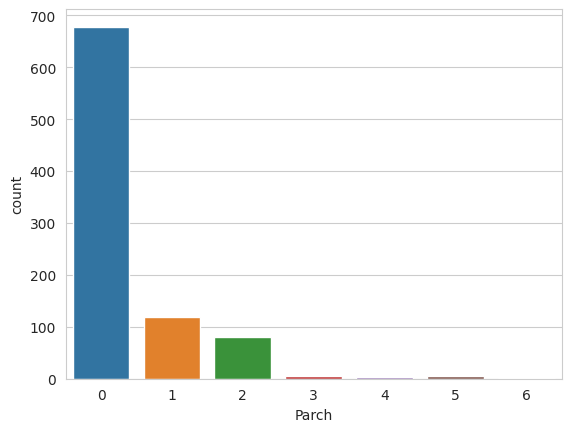

In [211]:
sns.countplot(x='Parch',data=train)

# Data Cleaning

It can be observed from the map below that there are some missing values in the data

<Axes: >

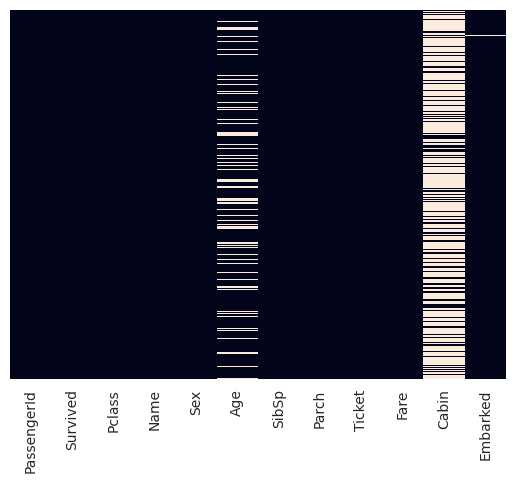

In [212]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False)

Age column has a reasonable percentage of values missing and Cabin column has almost all the values missing. What we do here is fill in the age values according to the mean age per class, and drop the cabin column

<Axes: xlabel='Pclass', ylabel='Age'>

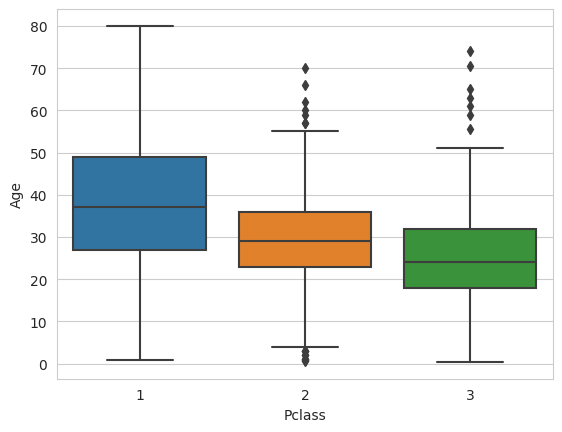

In [213]:
sns.set_style('whitegrid')
sns.boxplot(x='Pclass',y='Age',data=train)

In [214]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 37
        if pclass==2:
            return 29
        if pclass==3:
            return 24
    else:
        return age
            

In [215]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

/tmp/ipykernel_33/2861023028.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age=cols[0]
/tmp/ipykernel_33/2861023028.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass=cols[1]


We observe in the heatmap that the age column has zero null values now

<Axes: >

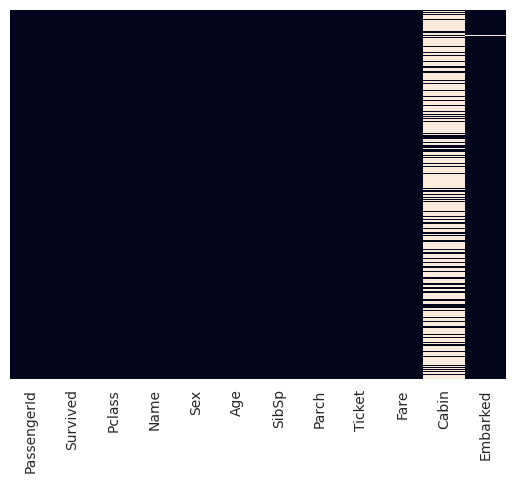

In [216]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False)

Any kind of modification done to the train data must be done to the test data as well, so i'll be doing that side by side 

<Axes: >

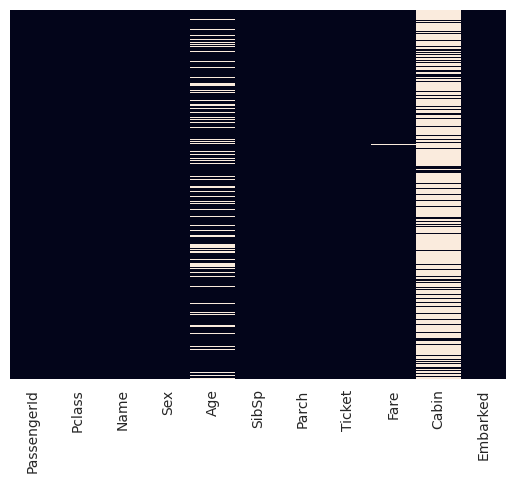

In [217]:
sns.heatmap(test.isnull(),cbar=False,yticklabels=False)

In [218]:
test['Age']=test[['Age','Pclass']].apply(impute_age,axis=1)

/tmp/ipykernel_33/2861023028.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age=cols[0]
/tmp/ipykernel_33/2861023028.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass=cols[1]


<Axes: >

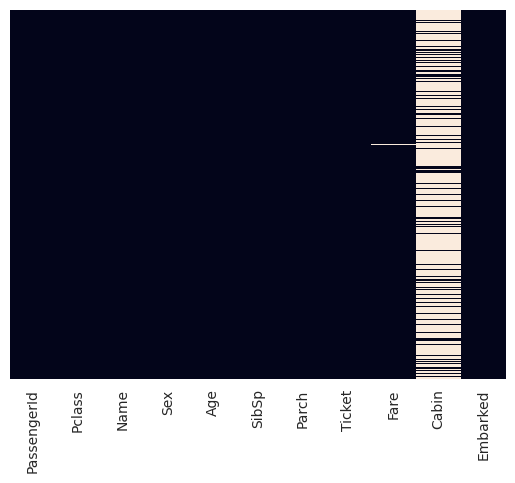

In [219]:
sns.heatmap(test.isnull(),cbar=False,yticklabels=False)

Dropping the Cabin column

In [220]:
train.drop('Cabin',axis=1,inplace=True)

In [221]:
test.drop('Cabin',axis=1,inplace=True)

Fill the null Fare values as well

<Axes: xlabel='Pclass', ylabel='Fare'>

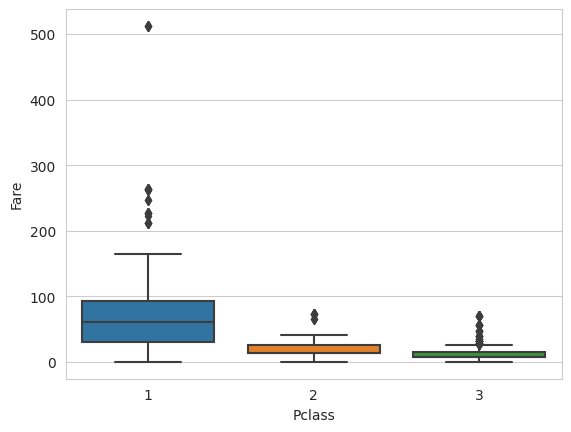

In [222]:
sns.set_style("whitegrid")
sns.boxplot(x='Pclass',y='Fare',data=train)

In [223]:
def impute_fare(cols):
    fare=cols[0]
    pclass=cols[1]
    
    if pd.isnull(fare):
        if pclass==1:
            return 65
        if pclass==2:
            return 30
        if pclass==3:
            return 20
    else:
        return fare

In [224]:
train['Fare']=train[['Fare','Pclass']].apply(impute_fare,axis=1)
test['Fare']=test[['Fare','Pclass']].apply(impute_fare,axis=1)

/tmp/ipykernel_33/3644209387.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fare=cols[0]
/tmp/ipykernel_33/3644209387.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass=cols[1]
/tmp/ipykernel_33/3644209387.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fare=cols[0]
/tmp/ipykernel_33/3644209387.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will al

Now we add some dummy features


In [225]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [226]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)
sext=pd.get_dummies(test['Sex'],drop_first=True)
embarkt=pd.get_dummies(test['Embarked'],drop_first=True)

In [227]:
train=pd.concat([train,sex,embark],axis=1)
test=pd.concat([test,sext,embarkt],axis=1)

In [228]:
train.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
test.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [229]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


Now we have cleaned both training and testing data

# Model Building

In [230]:
from sklearn.linear_model import LogisticRegression

In [231]:
log=LogisticRegression()

In [232]:
x_train=train.drop(['PassengerId','Survived'],axis=1)
y_train=train['Survived']

In [233]:
log.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [234]:
predictions=log.predict(test.drop(['PassengerId'],axis=1))

In [235]:
ans=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})
ans.to_csv("submission.csv",index=False)
print("success")

success


In [236]:
ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
